In [1]:
# Python SQL toolkit and Object Relational Mapper

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#Libraries for Session
from sqlalchemy.orm import sessionmaker

#Libraries for inspection
from sqlalchemy import create_engine, func, inspect

In [2]:
#Python Libraries 
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

#Base.prepare(autoload_with=engine)


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

# Create a session factory
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

# Inspect Tables

In [9]:
#Create the inspector to Inspect the databse tables
inspector=inspect(engine)

###  Measurement Table

In [10]:
#Ectract the Measurement table
measurements = engine.execute('SELECT * FROM Measurement limit 10')


In [11]:
#Get the columns names
measurements.keys()

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])

In [12]:
#Fetch the data from the table
measurements.fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
#Get the columns names and data types

columns = inspector.get_columns('Measurement')

for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Station Table

In [14]:
#Ectract the Station table
stations = engine.execute('SELECT * FROM Station limit 10')

In [15]:
#Get the columns names
stations.keys()

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])

In [16]:
#Fetch the data from the table
stations.fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
#Get the columns names and data types

columns = inspector.get_columns('Station')

for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

most_recent_date = dt.date.fromisoformat(most_recent_date)

print(f"The most recent date in the dataset is ('{most_recent_date}')")

The most recent date in the dataset is ('2017-08-23')


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
Prev_Last_date = dt.date(most_recent_date.year-1,most_recent_date.month,most_recent_date.day)
Prev_Last_date


# Perform a query to retrieve the data and precipitation scores
precipitation_analysis = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date >= func.strftime("%Y-%m-%d", Prev_Last_date)).\
    group_by(Measurement.date).order_by(Measurement.date).all()

precipitation_analysis




# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_analysis_df = pd.DataFrame(precipitation_analysis, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_analysis_df.set_index('date', inplace= True)

#Dispplay the DataFrame
precipitation_analysis_df.head(10)




,precipitation
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


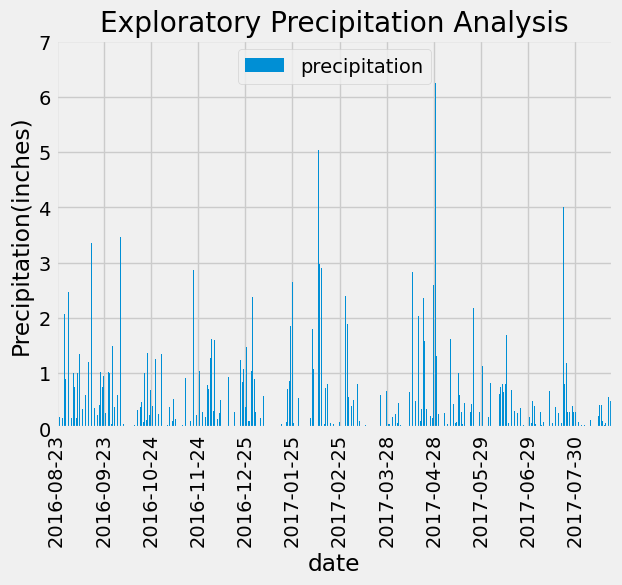

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_analysis_df.plot.bar()


#plt.tight_layout()

plt.xticks(rotation = 90)
plt.title("Exploratory Precipitation Analysis")
plt.ylabel("Precipitation(inches)")
plt.locator_params(axis='x',nbins=12)
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation_analysis_max = precipitation_analysis_df.groupby(["date"]).max()["precipitation"] 
precipitation_analysis_min = precipitation_analysis_df.groupby(["date"]).min()["precipitation"] 
precipitation_analysis_sum = precipitation_analysis_df.groupby(["date"]).sum()["precipitation"] 
precipitation_analysis_count = precipitation_analysis_df.groupby(["date"]).count()["precipitation"] 

#Create the summary dictionary 
precipitation_analysis_dict = {"Max": precipitation_analysis_max
                 ,"Min":precipitation_analysis_min
                 ,"Sum":precipitation_analysis_sum
                 ,"Count":precipitation_analysis_count 
                }

#Convert dictionary to DataFrame
precipitation_analysis_summary_df = pd.DataFrame(precipitation_analysis_dict)

#Display the DatFrame
precipitation_analysis_summary_df.head(10)

,Max,Min,Sum,Count
date,,,,
2016-08-23,1.79,1.79,1.79,1
2016-08-24,2.28,2.28,2.28,1
2016-08-25,0.21,0.21,0.21,1
2016-08-26,0.04,0.04,0.04,1
2016-08-27,0.18,0.18,0.18,1
2016-08-28,2.07,2.07,2.07,1
2016-08-29,0.90,0.90,0.90,1
2016-08-30,0.05,0.05,0.05,1
2016-08-31,2.46,2.46,2.46,1


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_analysis_df.describe()


,precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
active_stations = session.query(Station.station).count()

active_stations

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_most_active_stations = session.query( Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

all_most_active_stations = query_most_active_stations.all()
all_most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = query_most_active_stations.first()[0]
most_active_station_id

temp_summary = session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
    ).\
    filter(Measurement.station == most_active_station_id).all()

temp_summary

[(54.0, 85.0, 71.66378066378067)]

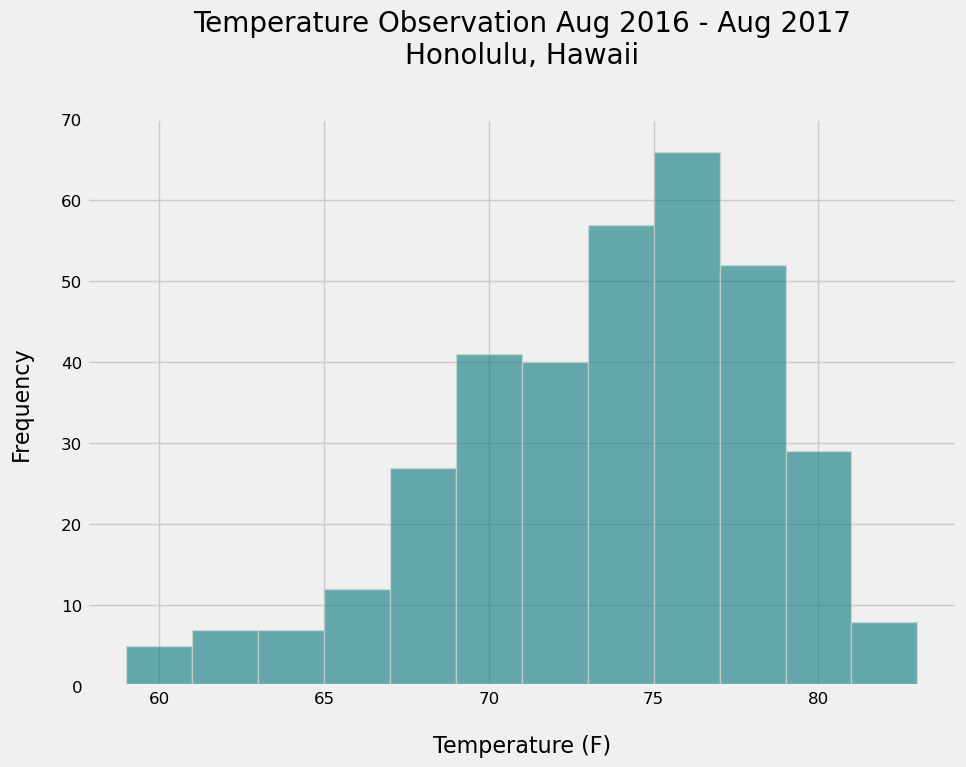

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > Prev_Last_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs

#Convert to the DataFrame
tobs_analysis_df=pd.DataFrame(year_tobs)
tobs_analysis_df.set_index('date',inplace=True)



#Plot the DataFrame
plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_analysis_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray', linewidth=1,color='xkcd:deep aqua')


#Set the tile & labels 
plt.title('Temperature Observation Aug 2016 - Aug 2017\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

#Display the Plot
plt.show()

# Close Session

In [28]:
# Close Session
session.close()